<a href="https://colab.research.google.com/github/marianamoledomoreira/tcc_mba_cd/blob/main/Analise_exploratoria_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install feature_engine
import pandas as pd
from sklearn import feature_selection
from feature_engine.encoding import OneHotEncoder
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
from sklearn import pipeline
from sklearn import cluster
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 5.7 MB/s eta 0:00:00


In [6]:
# Carregar os dados
file_path = "bd_alunos_evadidos.csv"
df = pd.read_csv(file_path, sep=';', encoding='utf-8')

In [7]:
df.columns

Index(['Unnamed: 0', 'CODALUNO', 'ACAOAFIRMATIVA', 'ENEMLINGUAGEM',
       'ENEMHUMANAS', 'ENEMNATURAIS', 'ENEMMATEMATICA', 'ENEMREDACAO', 'CURSO',
       'CODTURNOINGRESSO', 'CODTURNOATUAL', 'TURNOATUAL', 'CR', 'DISCIPLINA',
       'NOTADISC', 'RESULTDISC', 'PERIODODISC', 'ANOINGRESSO',
       'SEMESTREINGRESSO', 'ANODESVINCULACAO', 'SEMESTREDESVINCULACAO',
       'IDADE', 'COR', 'BAIRRO', 'CEP', 'CIDADE', 'MOBILIDADE', 'CHCURSADA',
       'ESTADOCIVIL', 'TRANCAMENTOS', 'TEMPOPERMANENCIA', 'SEXO',
       'STATUSFORMACAO', 'NOME_CURSO', 'AREACURSO'],
      dtype='object')

In [9]:
df.dtypes

Unnamed: 0                 int64
CODALUNO                   int64
ACAOAFIRMATIVA            object
ENEMLINGUAGEM            float64
ENEMHUMANAS              float64
ENEMNATURAIS             float64
ENEMMATEMATICA           float64
ENEMREDACAO              float64
CURSO                      int64
CODTURNOINGRESSO           int64
CODTURNOATUAL              int64
TURNOATUAL                object
CR                       float64
DISCIPLINA                object
NOTADISC                   int64
RESULTDISC                 int64
PERIODODISC                int64
ANOINGRESSO                int64
SEMESTREINGRESSO           int64
ANODESVINCULACAO           int64
SEMESTREDESVINCULACAO      int64
IDADE                      int64
COR                       object
BAIRRO                    object
CEP                       object
CIDADE                    object
MOBILIDADE                 int64
CHCURSADA                  int64
ESTADOCIVIL               object
TRANCAMENTOS               int64
TEMPOPERMA

In [8]:
df.head()

,Unnamed: 0,CODALUNO,ACAOAFIRMATIVA,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CURSO,CODTURNOINGRESSO,...,CIDADE,MOBILIDADE,CHCURSADA,ESTADOCIVIL,TRANCAMENTOS,TEMPOPERMANENCIA,SEXO,STATUSFORMACAO,NOME_CURSO,AREACURSO
0,0,112001032,AC,485.0,593.3,521.5,633.1,840.0,1,8,...,NITERÓI,0,2580,SOLTEIRO,0,4,M,EVADIDO,BIBLIOTECONOMIA E DOCUMENTAÇÃO,Ciências Sociais Aplicadas
1,1,112001035,AC,632.1,653.4,564.2,662.4,640.0,1,8,...,RIO DE JANEIRO,0,60,SOLTEIRO,1,1,F,EVADIDO,BIBLIOTECONOMIA E DOCUMENTAÇÃO,Ciências Sociais Aplicadas
2,2,112001037,AC,597.9,608.3,583.3,703.2,660.0,1,8,...,BELFORD ROXO,0,60,SOLTEIRO,0,1,F,EVADIDO,BIBLIOTECONOMIA E DOCUMENTAÇÃO,Ciências Sociais Aplicadas
3,3,112001039,AC,598.7,555.8,565.9,612.3,700.0,1,8,...,RIO DE JANEIRO,0,1280,SOLTEIRO,0,6,M,EVADIDO,BIBLIOTECONOMIA E DOCUMENTAÇÃO,Ciências Sociais Aplicadas
4,4,112001048,AC,635.4,613.4,575.3,679.9,500.0,1,8,...,NITERÓI,0,0,SOLTEIRO,0,1,M,EVADIDO,BIBLIOTECONOMIA E DOCUMENTAÇÃO,Ciências Sociais Aplicadas


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9836 entries, 0 to 9835
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             9836 non-null   int64  
 1   CODALUNO               9836 non-null   int64  
 2   ACAOAFIRMATIVA         9836 non-null   object 
 3   ENEMLINGUAGEM          9836 non-null   float64
 4   ENEMHUMANAS            9836 non-null   float64
 5   ENEMNATURAIS           9836 non-null   float64
 6   ENEMMATEMATICA         9836 non-null   float64
 7   ENEMREDACAO            9836 non-null   float64
 8   CURSO                  9836 non-null   int64  
 9   CODTURNOINGRESSO       9836 non-null   int64  
 10  CODTURNOATUAL          9836 non-null   int64  
 11  TURNOATUAL             9822 non-null   object 
 12  CR                     9836 non-null   float64
 13  DISCIPLINA             9836 non-null   object 
 14  NOTADISC               9836 non-null   int64  
 15  RESU

In [12]:
df.describe()

,Unnamed: 0,CODALUNO,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CURSO,CODTURNOINGRESSO,CODTURNOATUAL,...,PERIODODISC,ANOINGRESSO,SEMESTREINGRESSO,ANODESVINCULACAO,SEMESTREDESVINCULACAO,IDADE,MOBILIDADE,CHCURSADA,TRANCAMENTOS,TEMPOPERMANENCIA
count,9836.000000,9.836000e+03,9836.000000,9836.000000,9836.000000,9836.000000,9836.000000,9836.000000,9836.000000,9836.000000,...,9836.000000,9836.000000,9836.000000,9836.000000,9836.000000,9836.000000,9836.0,9836.000000,9836.000000,9836.000000
mean,4917.500000,1.566173e+08,592.826474,631.829046,579.529880,664.854168,707.764843,119.682696,6.444693,6.191846,...,20135.820557,2013.236783,1.433306,2015.232615,1.461163,27.190525,0.0,379.498373,0.033245,2.995832
std,2839.552958,4.953476e+07,56.995818,71.670834,71.169209,98.845579,134.614623,135.844353,2.524087,2.366711,...,8.637525,0.726262,0.495557,1.819227,0.498515,6.850402,0.0,483.185861,0.205202,1.759362
min,0.000000,1.120010e+08,100.000000,0.000000,0.000000,100.000000,100.000000,1.000000,2.000000,1.000000,...,20091.000000,2012.000000,1.000000,2012.000000,1.000000,21.000000,0.0,0.000000,0.000000,1.000000
25%,2458.750000,1.130671e+08,563.375000,589.100000,538.300000,606.975000,620.000000,23.000000,4.000000,4.000000,...,20131.000000,2013.000000,1.000000,2014.000000,1.000000,23.000000,0.0,0.000000,0.000000,1.000000
50%,4917.500000,1.140761e+08,598.900000,638.700000,585.100000,673.750000,720.000000,48.000000,8.000000,8.000000,...,20132.000000,2013.000000,1.000000,2015.000000,1.000000,25.000000,0.0,240.000000,0.000000,3.000000
75%,7376.250000,2.130471e+08,630.225000,681.000000,627.400000,733.200000,800.000000,241.000000,8.000000,8.000000,...,20141.000000,2014.000000,2.000000,2017.000000,2.000000,28.000000,0.0,540.000000,0.000000,5.000000
max,9835.000000,2.141071e+08,786.000000,885.500000,845.200000,955.200000,1000.000000,562.000000,14.000000,14.000000,...,20181.000000,2014.000000,2.000000,2018.000000,2.000000,64.000000,0.0,6070.000000,3.000000,7.000000


In [13]:
df.isnull().sum()

Unnamed: 0                  0
CODALUNO                    0
ACAOAFIRMATIVA              0
ENEMLINGUAGEM               0
ENEMHUMANAS                 0
ENEMNATURAIS                0
ENEMMATEMATICA              0
ENEMREDACAO                 0
CURSO                       0
CODTURNOINGRESSO            0
CODTURNOATUAL               0
TURNOATUAL                 14
CR                          0
DISCIPLINA                  0
NOTADISC                    0
RESULTDISC                  0
PERIODODISC                 0
ANOINGRESSO                 0
SEMESTREINGRESSO            0
ANODESVINCULACAO            0
SEMESTREDESVINCULACAO       0
IDADE                       0
COR                         0
BAIRRO                      0
CEP                      7847
CIDADE                      0
MOBILIDADE                  0
CHCURSADA                   0
ESTADOCIVIL                 0
TRANCAMENTOS                0
TEMPOPERMANENCIA            0
SEXO                        0
STATUSFORMACAO              0
NOME_CURSO

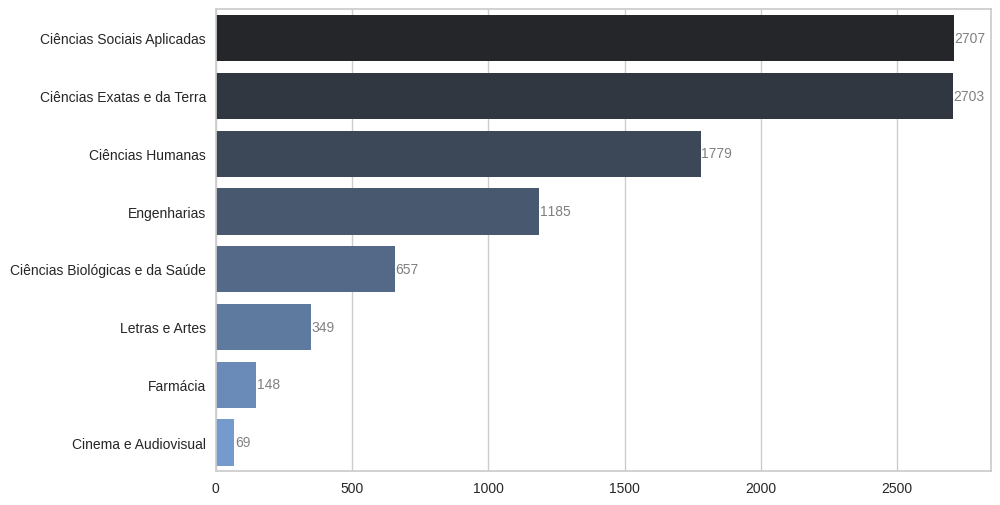

In [14]:
# Frequência da variável 'AREACURSO'
frequencia_areacurso = df['AREACURSO'].value_counts()

palette = sns.dark_palette("#69d", len(frequencia_areacurso))
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=frequencia_areacurso.values, y=frequencia_areacurso.index, palette=palette, orient='h')

for i, v in enumerate(frequencia_areacurso.values):
    ax.text(v + 3, i, str(v), color='gray', va='center', fontsize=10)

plt.show()

In [15]:
def agrupar_categorias(categoria):
    if categoria in ['Ciências Exatas e da Terra', 'Engenharias']:
        return 'Exatas'
    elif categoria in ['Ciências Sociais Aplicadas', 'Ciências Humanas']:
        return 'Humanas'
    else:
        return 'Outras'

# Criar uma nova coluna 'Grupo_area_curso'
df['Grupo_area_curso'] = df['AREACURSO'].apply(agrupar_categorias)
contagem_por_grupo_area_curso = df['Grupo_area_curso'].value_counts()
print("\nContagem por grupo 'Grupo_area_curso':")
print(contagem_por_grupo_area_curso)


Contagem por grupo 'Grupo_area_curso':
Humanas    4486
Exatas     3888
Outras     1462
Name: Grupo_area_curso, dtype: int64


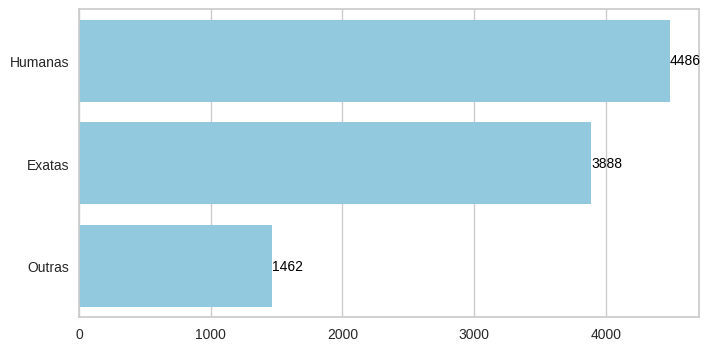

In [16]:
plt.figure(figsize=(8, 4))
sns.barplot(x=contagem_por_grupo_area_curso.values, y=contagem_por_grupo_area_curso.index, color='skyblue')

for i, v in enumerate(contagem_por_grupo_area_curso.values):
    plt.text(v + 3, i, str(v), color='black', va='center', fontsize=10)

plt.show()


In [17]:
frequencia_areafirmativa = df['ACAOAFIRMATIVA'].value_counts()
print("\nFrequência da variável 'ACAOAFIRMATIVA':")
print(frequencia_areafirmativa)



Frequência da variável 'ACAOAFIRMATIVA':
AC    7712
A1     578
L2     570
L4     548
L1     235
L3     193
Name: ACAOAFIRMATIVA, dtype: int64


Text(0, 0.5, 'Frequência')

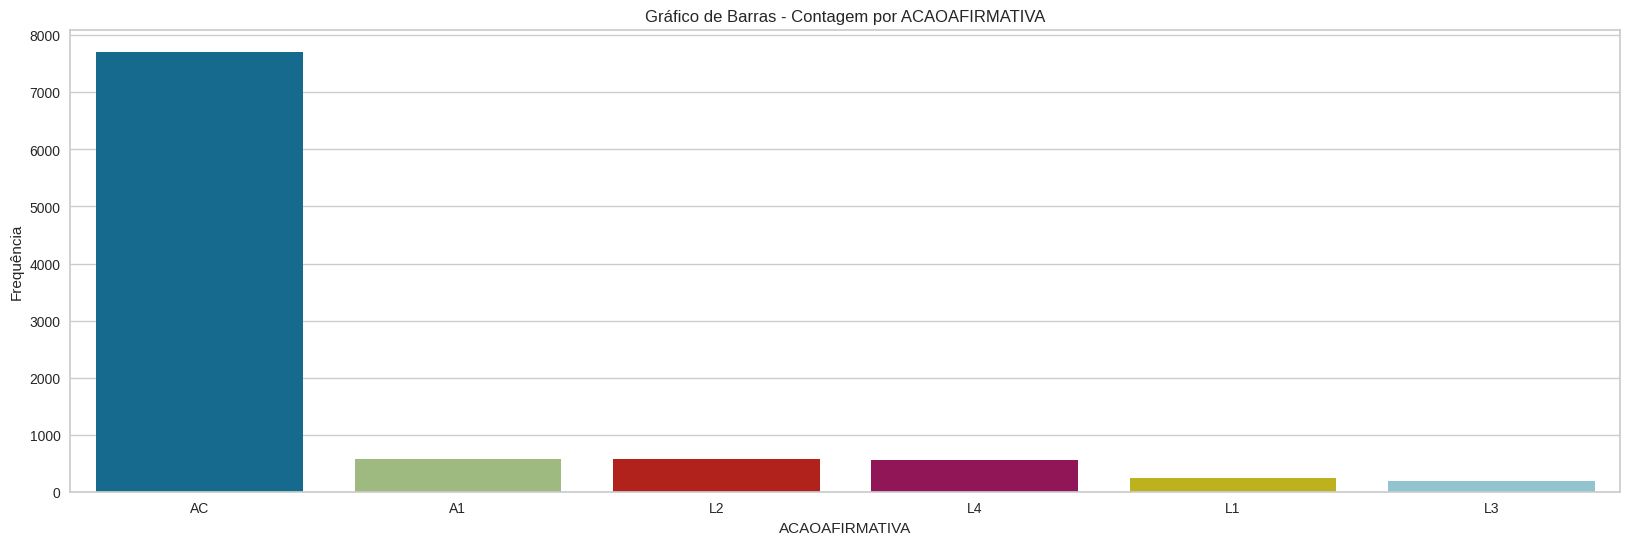

In [18]:
plt.figure(figsize=(20, 6))
sns.barplot(x=frequencia_areafirmativa.index, y=frequencia_areafirmativa.values)
plt.title('Gráfico de Barras - Contagem por ACAOAFIRMATIVA')
plt.xlabel('ACAOAFIRMATIVA')
plt.ylabel('Frequência')

In [19]:
def categorias_to_grupo(categoria):
    if categoria in ['AC', 'A0']:
        return 'Ampla Concorrência'
    else:
        return 'Ações Afirmativas'

# Criar uma nova coluna 'Grupo_criterio'
df['Grupo_criterio'] = df['ACAOAFIRMATIVA'].apply(categorias_to_grupo)
contagem_por_grupo_criterio = df['Grupo_criterio'].value_counts()
print("\nContagem por grupo 'Grupo_criterio':")
print(contagem_por_grupo_criterio)


Contagem por grupo 'Grupo_criterio':
Ampla Concorrência    7712
Ações Afirmativas     2124
Name: Grupo_criterio, dtype: int64


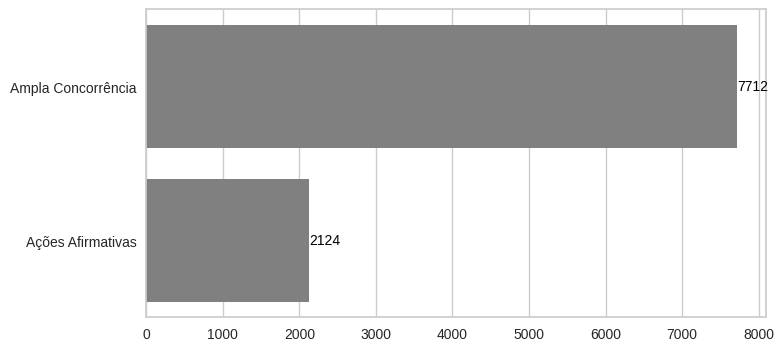

In [20]:
plt.figure(figsize=(8, 4))
sns.barplot(x=contagem_por_grupo_criterio.values, y=contagem_por_grupo_criterio.index, color='grey')

for i, v in enumerate(contagem_por_grupo_criterio.values):
    plt.text(v + 3, i, str(v), color='black', va='center', fontsize=10)

plt.show()


In [21]:
sexo_freq = df['SEXO'].value_counts()
sexo_percentual = (df['SEXO'].value_counts(normalize=True) * 100).round(2)
tabela_frequencia_sexo = pd.DataFrame({'Frequência': sexo_freq, 'Percentual (%)': sexo_percentual})

print(tabela_frequencia_sexo)


   Frequência  Percentual (%)
M        5343           54.32
F        4493           45.68


In [22]:
semestre_ingresso_freq = df['SEMESTREINGRESSO'].value_counts()
semestre_ingresso_freq_percentual = (df['SEMESTREINGRESSO'].value_counts(normalize=True) * 100).round(2)


tabela_frequencia_semestre_ingresso = pd.DataFrame({'Frequência': semestre_ingresso_freq, 'Percentual (%)': semestre_ingresso_freq_percentual})


print(tabela_frequencia_semestre_ingresso)

   Frequência  Percentual (%)
1        5574           56.67
2        4262           43.33


In [23]:
idade_freq = df['IDADE'].value_counts()
idade_freq_percentual = (df['IDADE'].value_counts(normalize=True) * 100).round(2)

tabela_frequencia_idade = pd.DataFrame({'Frequência': idade_freq, 'Percentual (%)': idade_freq_percentual})

print(tabela_frequencia_idade)

    Frequência  Percentual (%)
23        1965           19.98
24        1923           19.55
25        1163           11.82
22         885            9.00
26         689            7.00
27         481            4.89
28         352            3.58
29         281            2.86
30         256            2.60
31         206            2.09
32         202            2.05
33         167            1.70
34         140            1.42
35         123            1.25
36          89            0.90
37          89            0.90
38          68            0.69
39          65            0.66
21          58            0.59
40          55            0.56
41          47            0.48
42          45            0.46
46          43            0.44
44          38            0.39
45          38            0.39
50          36            0.37
51          35            0.36
47          30            0.31
52          29            0.29
43          28            0.28
54          26            0.26
53      

In [24]:
ESTADOCIVIL_freq = df['ESTADOCIVIL'].value_counts()
ESTADOCIVIL_freq_percentual = (df['ESTADOCIVIL'].value_counts(normalize=True) * 100).round(2)

tabela_frequencia_ESTADOCIVIL = pd.DataFrame({'Frequência': ESTADOCIVIL_freq, 'Percentual (%)': ESTADOCIVIL_freq_percentual})

print(tabela_frequencia_ESTADOCIVIL)

          Frequência  Percentual (%)
SOLTEIRO        9529           96.88
CASADO           307            3.12


In [25]:
TURNOATUAL_freq = df['TURNOATUAL'].value_counts()
TURNOATUAL_freq_percentual = (df['TURNOATUAL'].value_counts(normalize=True) * 100).round(2)

tabela_frequencia_TURNOATUAL = pd.DataFrame({'Frequência': TURNOATUAL_freq, 'Percentual (%)': TURNOATUAL_freq_percentual})

print(tabela_frequencia_TURNOATUAL)

            Frequência  Percentual (%)
INTEGRAL          5607           57.09
NOTURNO           3155           32.12
MATUTINO           779            7.93
VESPERTINO         281            2.86


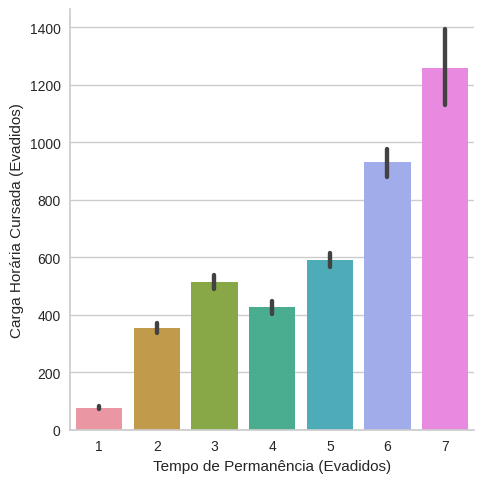

In [26]:
g= sns.catplot(x = "TEMPOPERMANENCIA", y = "CHCURSADA", data = df, kind = "bar")
g.set_ylabels("Carga Horária Cursada (Evadidos)")
g.set_xlabels("Tempo de Permanência (Evadidos)")
plt.show()